THỰC HÀNH 4: PHÂN VÙNG ẢNH

1. CÀI ĐẶT THƯ VIỆN

pip install opencv-python

2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH

2.1. Phân vùng theo histogram

2.1.1. Phương pháp Otsu

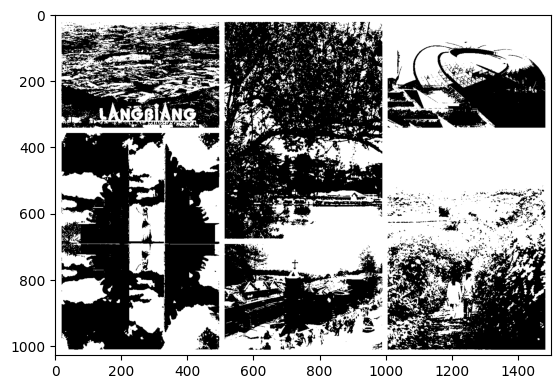

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a > thres
b = Image.fromarray(b)
plt.imshow(b)
plt.show()

2.1.2. Phương pháp Adaptive Thresholding

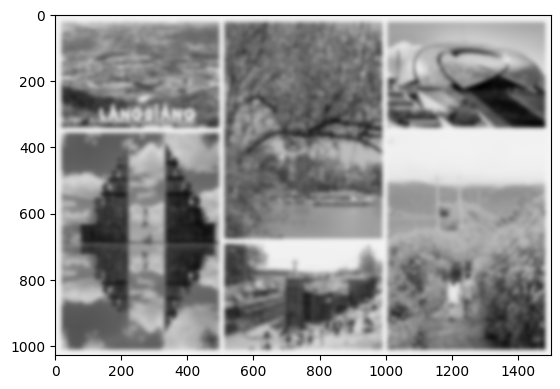

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('dalat.jpg').convert('L')
a = np.asarray (data)
b = threshold_local (a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow (b)
plt.show ()

2.2. Phân vùng theo region

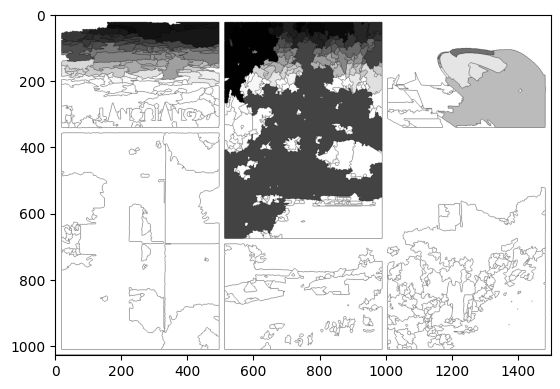

In [6]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2 = cv2.erode(bl, None, iterations = 2)
dist_trans = cv2.distanceTransform (b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)
plt.imshow(b)
plt.show()

2.3. Biến đổi đối tượng trong ảnh

2.3.1. Sử dụng binary_dilation

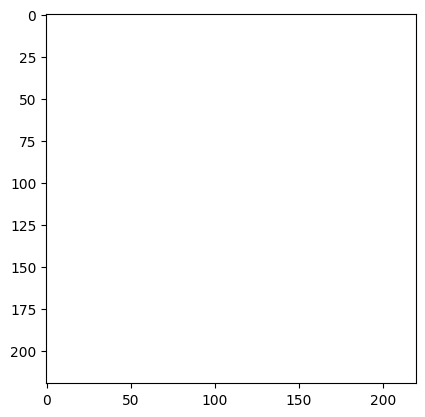

In [8]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)
c= Image.fromarray(b)
c.show()
plt.imshow (c)
plt.show ()

2.3.2. Sử dụng binary_opening

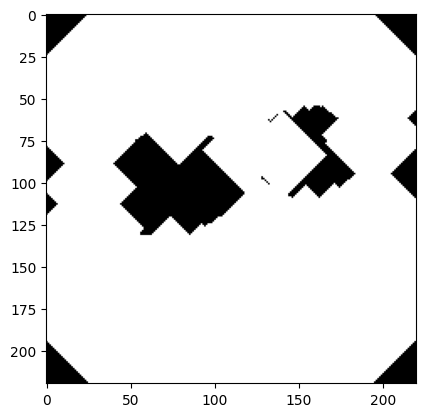

In [11]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dil_img.gif').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening (data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show ()
plt.imshow(c)
plt.show ()

2.3.3. Sử dụng binary_erosion

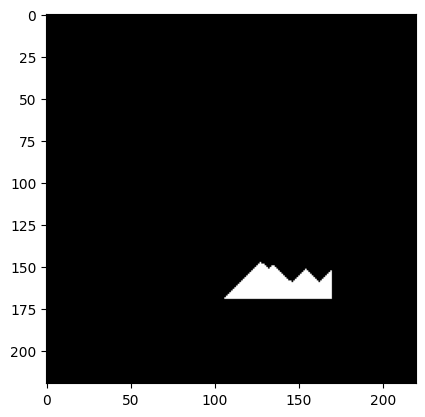

In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dil_img.gif').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


2.3.4. Sử dụng binary_closing

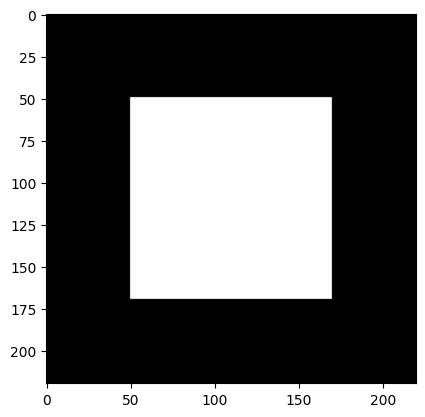

In [13]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dil_img.gif').convert('L')
s= [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b= nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show()
plt.imshow(c)
plt.show()


3. BÀI TẬP

1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

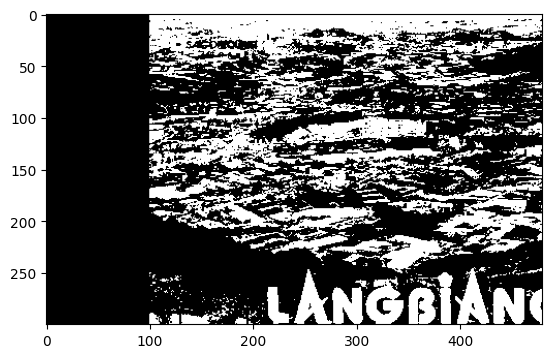

In [70]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')
a = np.array (data)
bmg = a[20:320, 20:500] 
bmg = nd.shift(bmg, shift=(0, 100))
thres = threshold_otsu(a)
binary = bmg > thres

iio.imsave('lang_biang.jpg', Image.fromarray((binary * 255).astype(np.uint8)))
plt.imshow(binary, cmap='gray')
plt.show()


2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.

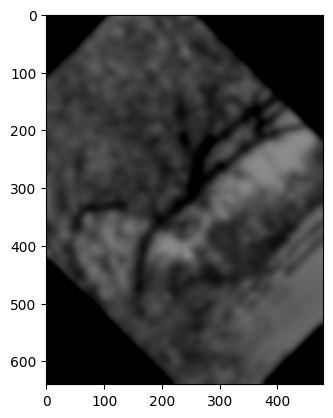

In [55]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dalat.jpg').convert('L')
a = np.asarray(data)

bmg = a[40:680, 510:990]
d = nd.rotate(bmg, 45, reshape=False)
a=np.array(d)
b = threshold_local (a, 39, offset=60)
b = Image.fromarray(b)
iio.imsave('ho_xuan_huong.jpg', b.convert('L'))

plt.imshow (b)
plt.show()

3. Viết chương trình chọn Quảng trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.

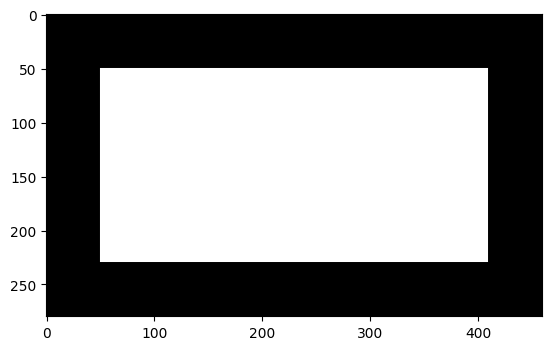

In [2]:
from PIL import Image 
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

data = Image.open('dalat.jpg').convert('L')
a = np.array(data)
bmg = a[50:330, 1010:1470]
V, H = bmg.shape
M = np.indices((V, H))
d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(bmg, mp)
s = ([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
b = nd.binary_closing(d1, structure=s, iterations=50)
c  = Image.fromarray(b)

iio.imsave("quang_truong_lam_vien.jpg", c.convert('L'))
plt.imshow(c, cmap='gray')
plt.show() 


4. Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_tranformation và segment.

In [ ]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import imageio.v2 as iio
from skimage.filters import threshold_otsu, threshold_local

def rotate_image(image):
    return nd.rotate(image, 45)

def shift_image(image):
    return nd.shift(image, (0, 100))

def coordinate_mapping(image):
    V, H = image.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    return nd.map_coordinates(image, mp)

def otsu_threshold(image):
    thres = threshold_otsu(image)
    return image > thres

def adaptive_threshold(image):
    b = threshold_local(image, 39, offset=60)
    return image > b

def binary_dilation(image):
    structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    return nd.binary_dilation(image, structure=structure)

def binary_erosion(image):
    structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    return nd.binary_erosion(image, structure=structure)

data = Image.open('dalat.jpg').convert('L')
a = np.array(data)
image = a[100:340, 100:450]

print("geometric_transformation:")
print("  1. Rotate")
print("  2. Shift")
print("  3. Coordinate_mapping")
print("segment:")
print("  4. Otsu")
print("  5. Adaptive_thresholding")
print("  6. Binary_dilation")
print("  7. Binary_erosion")
print("Nhập tối đa 2 số cách nhau bởi dấu phẩy (ví dụ: 1,2 nhập 1 số thì 3):")

lua_chon = input(">> ").strip().split(',')
result = image.copy()

for lc in lua_chon:
    lc = lc.strip()
    if lc == '1':
        result = rotate_image(result)
    elif lc == '2':
        result = shift_image(result)
    elif lc == '3':
        result = coordinate_mapping(result)
    elif lc == '4':
        result = otsu_threshold(result)
    elif lc == '5':
        result = adaptive_threshold(result)
    elif lc == '6':
        result = binary_dilation(result)
    elif lc == '7':
        result = binary_erosion(result)

plt.imshow(result, cmap='gray')
plt.show()